In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [55]:
API_Data = pd.read_excel(r'C:\Users\p.jeevith\Downloads\API_19_DS2_en_excel_v2_5252304.xlsx')

In [56]:
def choose_data(filename):
    path=r"C:\Users\p.jeevith\Downloads"
    API_Data = pd.read_excel(path + "/" + filename)
    API_Data_Archive = API_Data.copy()
    API_Data1 = API_Data[2:]
    API_Data1.columns = API_Data1.iloc[0]
    API_Data = API_Data1[1:]
    
    
    API_Data2 = pd.melt(API_Data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                        var_name="Year", value_name="Value")
    
    Country_As_Columns = API_Data2.pivot(index = ['Indicator Name', 'Indicator Code', 'Year'], columns = 'Country Name', 
                                      values = 'Value').reset_index()
    
    Date_As_Columns = API_Data2.pivot(index = ['Country Name', 'Country Code', 'Indicator Name'], columns = 'Year', 
                                      values = 'Value').reset_index()
    return Date_As_Columns , Country_As_Columns
    

In [57]:
def cleaning(data):
    columns = data.columns
    country_list = data['Country Name'].unique()
    Indicator_list = data['Indicator Name'].unique()
    
    data=data.sort_values(['Country Name','Indicator Name'])
    Clean_Data = pd.DataFrame()
    
    for i in Indicator_list:
        data_i = data[(data['Indicator Name']==i)]
        data_i['Value'] = data_i['Value'].fillna(data_i['Value'].mean())

    Clean_Data = Clean_Data.append(data_i)
    
    return Clean_Data    

In [58]:
Date_As_Columns , Country_As_Columns = choose_data('API_19_DS2_en_excel_v2_5252304.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [59]:
Date_As_Columns

Year,Country Name,Country Code,Indicator Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Afghanistan,AFG,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.910000e+01,6.829065e+01,8.950000e+01,7.150000e+01,9.770000e+01,9.770000e+01,9.661613e+01,9.770000e+01,9.770000e+01,NaN
1,Afghanistan,AFG,Agricultural irrigated land (% of total agricu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.465576e+00,5.518333e+00,5.742548e+00,5.710894e+00,6.481140e+00,5.990504e+00,5.122336e+00,6.006314e+00,6.499635e+00,NaN
2,Afghanistan,AFG,Agricultural land (% of land area),NaN,57.801696,57.893688,57.970348,58.066940,58.070006,58.128268,...,5.812367e+01,5.812367e+01,5.812367e+01,5.812367e+01,5.812367e+01,5.812367e+01,5.827699e+01,5.827699e+01,5.880748e+01,NaN
3,Afghanistan,AFG,Agricultural land (sq. km),NaN,377000.000000,377600.000000,378100.000000,378730.000000,378750.000000,379130.000000,...,3.791000e+05,3.791000e+05,3.791000e+05,3.791000e+05,3.791000e+05,3.791000e+05,3.801000e+05,3.801000e+05,3.835600e+05,NaN
4,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439087e+01,2.281066e+01,2.213704e+01,2.063432e+01,2.574031e+01,2.642020e+01,2.204290e+01,2.577397e+01,2.682060e+01,3.348450e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Zimbabwe,ZWE,Urban land area where elevation is below 5 met...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
20212,Zimbabwe,ZWE,Urban population,479900.000,503346.000000,529792.000000,567279.000000,607412.000000,650173.000000,695850.000000,...,4.355539e+06,4.426387e+06,4.503674e+06,4.584076e+06,4.667645e+06,4.755312e+06,4.848158e+06,4.945719e+06,5.052214e+06,5.166388e+06
20213,Zimbabwe,ZWE,Urban population (% of total population),12.608,12.821000,13.082000,13.578000,14.092000,14.620000,15.165000,...,3.283400e+01,3.265400e+01,3.250400e+01,3.238500e+01,3.229600e+01,3.223700e+01,3.220900e+01,3.221000e+01,3.224200e+01,3.230300e+01
20214,Zimbabwe,ZWE,Urban population growth (annual %),NaN,4.770006,5.120667,6.836677,6.835606,6.803117,6.789564,...,1.272568e+00,1.613531e+00,1.730983e+00,1.769505e+00,1.806610e+00,1.860765e+00,1.933653e+00,1.992351e+00,2.130421e+00,2.234724e+00


In [60]:
Date_As_Columns.describe()

Year,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
count,2.494000e+03,4.089000e+03,4.123000e+03,4.139000e+03,4.180000e+03,4.211000e+03,4.217000e+03,4.223000e+03,4.232000e+03,4.239000e+03,...,1.234000e+04,1.137900e+04,1.144800e+04,1.281000e+04,9.805000e+03,8.103000e+03,8.120000e+03,8.267000e+03,5.237000e+03,3.240000e+03
mean,2.533624e+07,1.641633e+07,1.707062e+07,1.820180e+07,1.876413e+07,1.948666e+07,2.186737e+07,2.269768e+07,2.431729e+07,2.566231e+07,...,7.140838e+08,9.255010e+08,1.046121e+09,1.077975e+09,1.271117e+07,1.558175e+07,1.578658e+07,1.573369e+07,2.501721e+07,4.068436e+07
std,1.976524e+08,1.663312e+08,1.757327e+08,1.921580e+08,1.999043e+08,2.106989e+08,2.505850e+08,2.610100e+08,2.876710e+08,3.088984e+08,...,1.832972e+10,2.251616e+10,2.529338e+10,2.736852e+10,1.842849e+08,2.054454e+08,2.079847e+08,2.087968e+08,2.651510e+08,3.399425e+08
min,-3.667000e+00,-3.667000e+00,-3.667000e+00,-3.703670e+02,-3.667000e+00,-2.354033e+00,-3.667000e+00,-2.829547e+00,-7.260660e+02,-4.787105e+00,...,-4.854332e+05,-4.542582e+05,-6.116137e+05,-6.381096e+05,-7.114856e+05,-4.165099e+01,-1.303131e+03,-1.167811e+01,-1.040590e+02,-1.174203e+02
25%,4.012768e+00,3.625775e+00,3.667000e+00,3.698381e+00,3.667000e+00,3.694502e+00,3.676550e+00,3.667000e+00,3.667000e+00,3.667000e+00,...,1.615304e+00,1.803916e+00,1.923595e+00,1.058149e+00,2.000000e+00,2.126727e+00,2.078032e+00,2.292627e+00,3.160533e+00,2.313692e+00
50%,5.709259e+01,4.292431e+01,4.313941e+01,4.313700e+01,4.313050e+01,4.270700e+01,4.281372e+01,4.296875e+01,4.281109e+01,4.377096e+01,...,2.940905e+01,3.028593e+01,3.026877e+01,1.736583e+01,2.660000e+01,2.266583e+01,2.243119e+01,2.425303e+01,2.410903e+01,1.504148e+01
75%,2.006829e+04,2.270000e+03,2.327439e+03,2.330500e+03,2.330250e+03,2.330550e+03,2.387685e+03,2.429153e+03,2.503644e+03,2.667623e+03,...,7.958318e+02,1.452900e+03,1.442818e+03,5.072590e+02,1.624481e+03,1.238314e+03,1.237863e+03,1.081500e+03,1.000000e+02,9.803029e+01
max,3.040000e+09,3.428000e+09,3.797000e+09,4.362000e+09,4.653000e+09,4.998000e+09,6.127000e+09,6.387000e+09,7.203000e+09,7.830000e+09,...,1.067911e+12,1.267134e+12,1.435701e+12,1.644540e+12,7.491934e+09,7.578158e+09,7.661776e+09,7.742682e+09,7.820982e+09,7.888409e+09


In [61]:
Country_As_Columns.describe()

Country Name,Year,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
count,4712.000000,1.815000e+03,2.036000e+03,2.063000e+03,2.267000e+03,2.408000e+03,761.000000,1097.000000,2.264000e+03,1758.000000,...,1.808000e+03,1721.000000,2.337000e+03,2.333000e+03,790.000000,9.300000e+02,2.229000e+03,2.233000e+03,2.338000e+03,2.344000e+03
mean,1990.500000,7.591120e+05,4.391977e+07,1.208158e+07,1.059543e+05,1.089744e+06,6348.082141,5390.795617,6.155215e+05,7555.235059,...,1.045776e+06,7458.526382,9.947671e+05,2.714223e+06,13598.792700,2.040880e+05,6.125967e+09,5.550925e+05,3.389447e+05,8.169464e+05
std,17.897429,3.786761e+06,3.600537e+08,5.344794e+07,4.845784e+05,5.324866e+06,15219.223518,16723.014373,3.153641e+06,48995.115011,...,4.386044e+06,34496.779307,4.441847e+06,1.387797e+07,33103.664458,7.855919e+05,6.926741e+10,3.028603e+06,1.724428e+06,7.967671e+06
min,1960.000000,-2.135118e+03,-2.975572e+04,-1.349237e+04,-4.599878e+02,-1.107946e+04,-366.666667,-3.314930,-4.811072e+03,-33.718441,...,-5.392858e+04,-950.000000,-1.696019e+04,-1.531838e+04,-750.000000,0.000000e+00,-1.064283e+06,-1.441799e+04,-3.642604e+02,-2.685186e+03
25%,1975.000000,5.313265e+00,2.813346e+00,2.726869e+00,1.163010e+00,1.977260e+00,2.927735,1.638298,4.279599e-01,0.308780,...,2.683757e+00,1.394586,2.947679e+00,3.500000e+00,1.064989,2.564082e+00,4.153662e+00,7.776904e-03,4.740698e-01,9.052032e-01
50%,1990.500000,3.945841e+01,3.247717e+01,3.371230e+01,3.154344e+01,2.309347e+01,20.050000,34.042553,2.124400e+01,16.200000,...,2.565258e+01,19.509897,3.272259e+01,3.242900e+01,24.085584,4.149241e+01,3.129882e+01,8.314071e+00,2.702350e+01,2.810572e+01
75%,2006.000000,6.967300e+02,4.725181e+04,3.178278e+03,9.907142e+02,6.329250e+02,89.670000,160.000000,5.313474e+02,110.000000,...,2.109613e+03,132.012000,2.044000e+03,1.821000e+03,100.000000,4.020000e+02,2.415640e+06,1.670000e+02,7.989710e+02,7.960976e+02
max,2021.000000,4.009946e+07,1.092600e+10,8.270000e+08,3.286542e+06,7.700000e+07,58324.000000,80221.000000,3.450377e+07,748754.961832,...,3.491510e+07,319137.000000,3.074146e+07,1.810000e+08,108642.000000,4.922749e+06,1.644540e+12,3.298164e+07,1.947312e+07,1.680000e+08


In [62]:
Urban_pop = Date_As_Columns[(Date_As_Columns['Indicator Name']=='Urban population growth (annual %)')&(Date_As_Columns['Country Name']=='India')]
Urban_pop.describe()

Year,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
count,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
mean,NaN,2.905442,3.337905,3.330305,3.328228,3.251894,3.168742,3.145867,3.180884,3.210154,...,2.470338,2.457264,2.423845,2.394053,2.413097,2.407475,2.35917,2.315802,2.263635,2.125468
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.905442,3.337905,3.330305,3.328228,3.251894,3.168742,3.145867,3.180884,3.210154,...,2.470338,2.457264,2.423845,2.394053,2.413097,2.407475,2.35917,2.315802,2.263635,2.125468
25%,NaN,2.905442,3.337905,3.330305,3.328228,3.251894,3.168742,3.145867,3.180884,3.210154,...,2.470338,2.457264,2.423845,2.394053,2.413097,2.407475,2.35917,2.315802,2.263635,2.125468
50%,NaN,2.905442,3.337905,3.330305,3.328228,3.251894,3.168742,3.145867,3.180884,3.210154,...,2.470338,2.457264,2.423845,2.394053,2.413097,2.407475,2.35917,2.315802,2.263635,2.125468
75%,NaN,2.905442,3.337905,3.330305,3.328228,3.251894,3.168742,3.145867,3.180884,3.210154,...,2.470338,2.457264,2.423845,2.394053,2.413097,2.407475,2.35917,2.315802,2.263635,2.125468
max,NaN,2.905442,3.337905,3.330305,3.328228,3.251894,3.168742,3.145867,3.180884,3.210154,...,2.470338,2.457264,2.423845,2.394053,2.413097,2.407475,2.35917,2.315802,2.263635,2.125468


In [63]:
Dates_Country_choosen= Date_As_Columns
# [(Date_As_Columns['Country Name']=='India')|(Date_As_Columns['Country Name']=='Australia')
#                 |(Date_As_Columns['Country Name']=='Japan')|(Date_As_Columns['Country Code']=='USA')
#                 |(Date_As_Columns['Country Name']=='United Kingdom')|(Date_As_Columns['Country Name']=='Germany')
#                 |(Date_As_Columns['Country Name']=='China')|(Date_As_Columns['Country Name']=='Brazil')]
# Dates_Country_choosen

In [64]:
API_Data2 = pd.melt(Dates_Country_choosen, id_vars=['Country Name', 'Country Code', 'Indicator Name'], 
                        var_name="Year", value_name="Value")
API_Data2

,Country Name,Country Code,Indicator Name,Year,Value
0,Afghanistan,AFG,Access to electricity (% of population),1960.0,NaN
1,Afghanistan,AFG,Agricultural irrigated land (% of total agricu...,1960.0,NaN
2,Afghanistan,AFG,Agricultural land (% of land area),1960.0,NaN
3,Afghanistan,AFG,Agricultural land (sq. km),1960.0,NaN
4,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",1960.0,NaN
...,...,...,...,...,...
1253387,Zimbabwe,ZWE,Urban land area where elevation is below 5 met...,2021.0,NaN
1253388,Zimbabwe,ZWE,Urban population,2021.0,5.166388e+06
1253389,Zimbabwe,ZWE,Urban population (% of total population),2021.0,3.230300e+01
1253390,Zimbabwe,ZWE,Urban population growth (annual %),2021.0,2.234724e+00


In [65]:
API_Data3 = API_Data2[API_Data2['Indicator Name']=='CO2 emissions (kt)']

In [100]:
# API_Data2['Indicator Name'].unique()
data_1 = API_Data2[API_Data2['Indicator Name'] =='CO2 emissions (metric tons per capita)'].rename(columns={'Indicator Name':'CO2 emissions (metric tons per capita)','Value':'CO2 emissions (metric tons per capita) value'})
data_2 = API_Data2[API_Data2['Indicator Name'] =='Access to electricity (% of population)'].rename(columns={'Indicator Name':'Access to electricity (% of population)','Value':'Access to electricity (% of population) value'})
data_3 = API_Data2[API_Data2['Indicator Name'] =='Electric power consumption (kWh per capita)'].rename(columns={'Indicator Name':'Electric power consumption (kWh per capita)','Value':'Electric power consumption (kWh per capita) value'})
data_4 = API_Data2[API_Data2['Indicator Name'] =='Renewable energy consumption (% of total final energy consumption)'].rename(columns={'Indicator Name':'Renewable energy consumption (% of total final energy consumption)','Value':'Renewable energy consumption (% of total final energy consumption) value'})
merge_1 = data_1.merge(data_2,on =['Country Name','Country Code','Year'])
merge_2 = merge_1.merge(data_3,on=['Country Name','Country Code','Year'])
merge_3 = merge_2.merge(data_4,on=['Country Name','Country Code','Year'])
merge_4 = merge_3.dropna()
merge_5 = merge_4[['Country Name','Year','CO2 emissions (metric tons per capita) value','Access to electricity (% of population) value',
         'Electric power consumption (kWh per capita) value','Renewable energy consumption (% of total final energy consumption) value']]

In [102]:
Kmeans_data = merge_5[['Electric power consumption (kWh per capita) value',
       'CO2 emissions (metric tons per capita) value']]
merge_5 = merge_5[['Country Name', 'Year', 'Electric power consumption (kWh per capita) value',
       'CO2 emissions (metric tons per capita) value']]

In [103]:
from sklearn.cluster import KMeans

In [104]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Kmeans_data)

KMeans(n_clusters=3)

In [105]:
kmeans.cluster_centers_

array([[1.33804892e+03, 2.45605938e+00],
       [6.36550786e+03, 9.84958591e+00],
       [1.75444062e+04, 1.73148497e+01]])

<AxesSubplot:xlabel='Electric power consumption (kWh per capita) value', ylabel='CO2 emissions (metric tons per capita) value'>

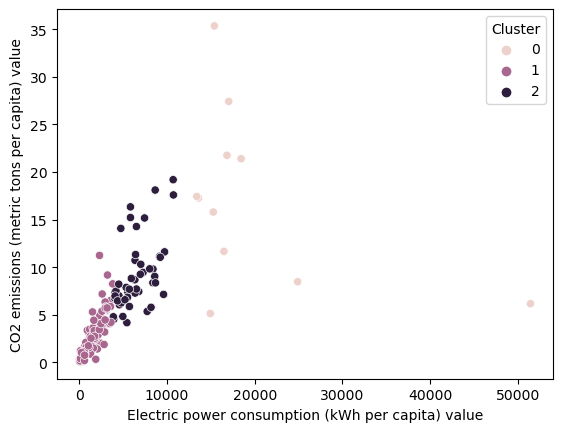

In [107]:
cluster = kmeans.fit_predict(Kmeans_data)
merge_5['Cluster'] = cluster
output_cluster_2010 = merge_5[merge_5['Year']==2010]
sns.scatterplot(output_cluster_2010, x='Electric power consumption (kWh per capita) value',y='CO2 emissions (metric tons per capita) value',hue='Cluster')

In [113]:
output_cluster_2010[output_cluster_2010['Cluster']==0].sort_values('Electric power consumption (kWh per capita) value')

,Country Name,Year,Electric power consumption (kWh per capita) value,CO2 emissions (metric tons per capita) value,Cluster
13553,United States,2010.0,13394.902755,17.431738,0
13479,North America,2010.0,13580.594193,17.271795,0
13534,Sweden,2010.0,14934.326965,5.132156,0
13338,Canada,2010.0,15269.745477,15.792141,0
13500,Qatar,2010.0,15393.602816,35.354456,0
13381,Finland,2010.0,16484.094275,11.658753,0
13446,Luxembourg,2010.0,16829.962541,21.757440,0
13428,Kuwait,2010.0,17033.617408,27.424478,0
13317,Bahrain,2010.0,18442.790107,21.398349,0
13482,Norway,2010.0,24890.924010,8.469598,0


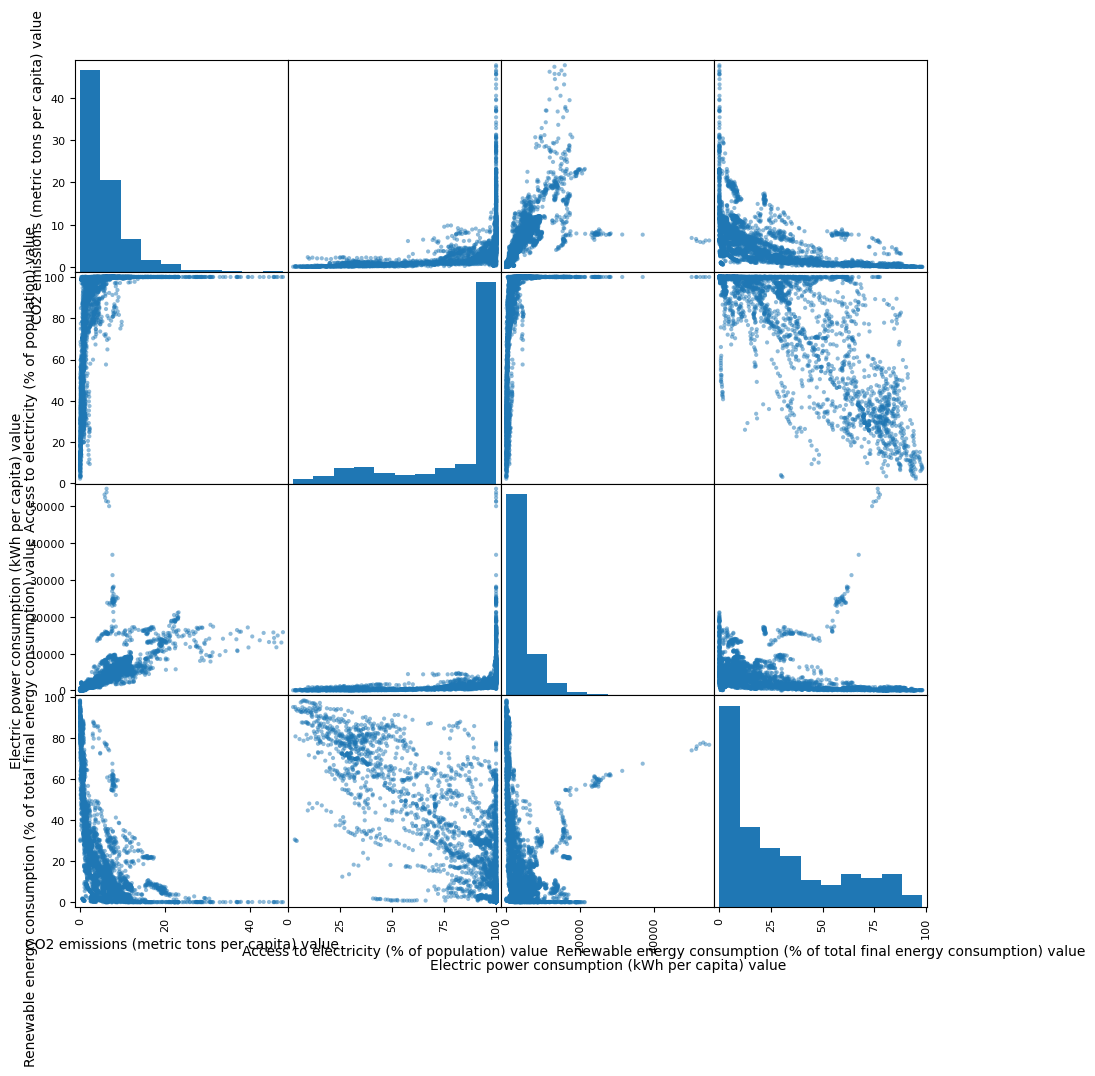

In [91]:
merge_3[['Country Name','Year','CO2 emissions (metric tons per capita) value','Access to electricity (% of population) value',
         'Electric power consumption (kWh per capita) value','Renewable energy consumption (% of total final energy consumption) value']].head(3)
merge_3.head(3).reset_index()
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(merge_4,figsize=(11,11))
plt.show()

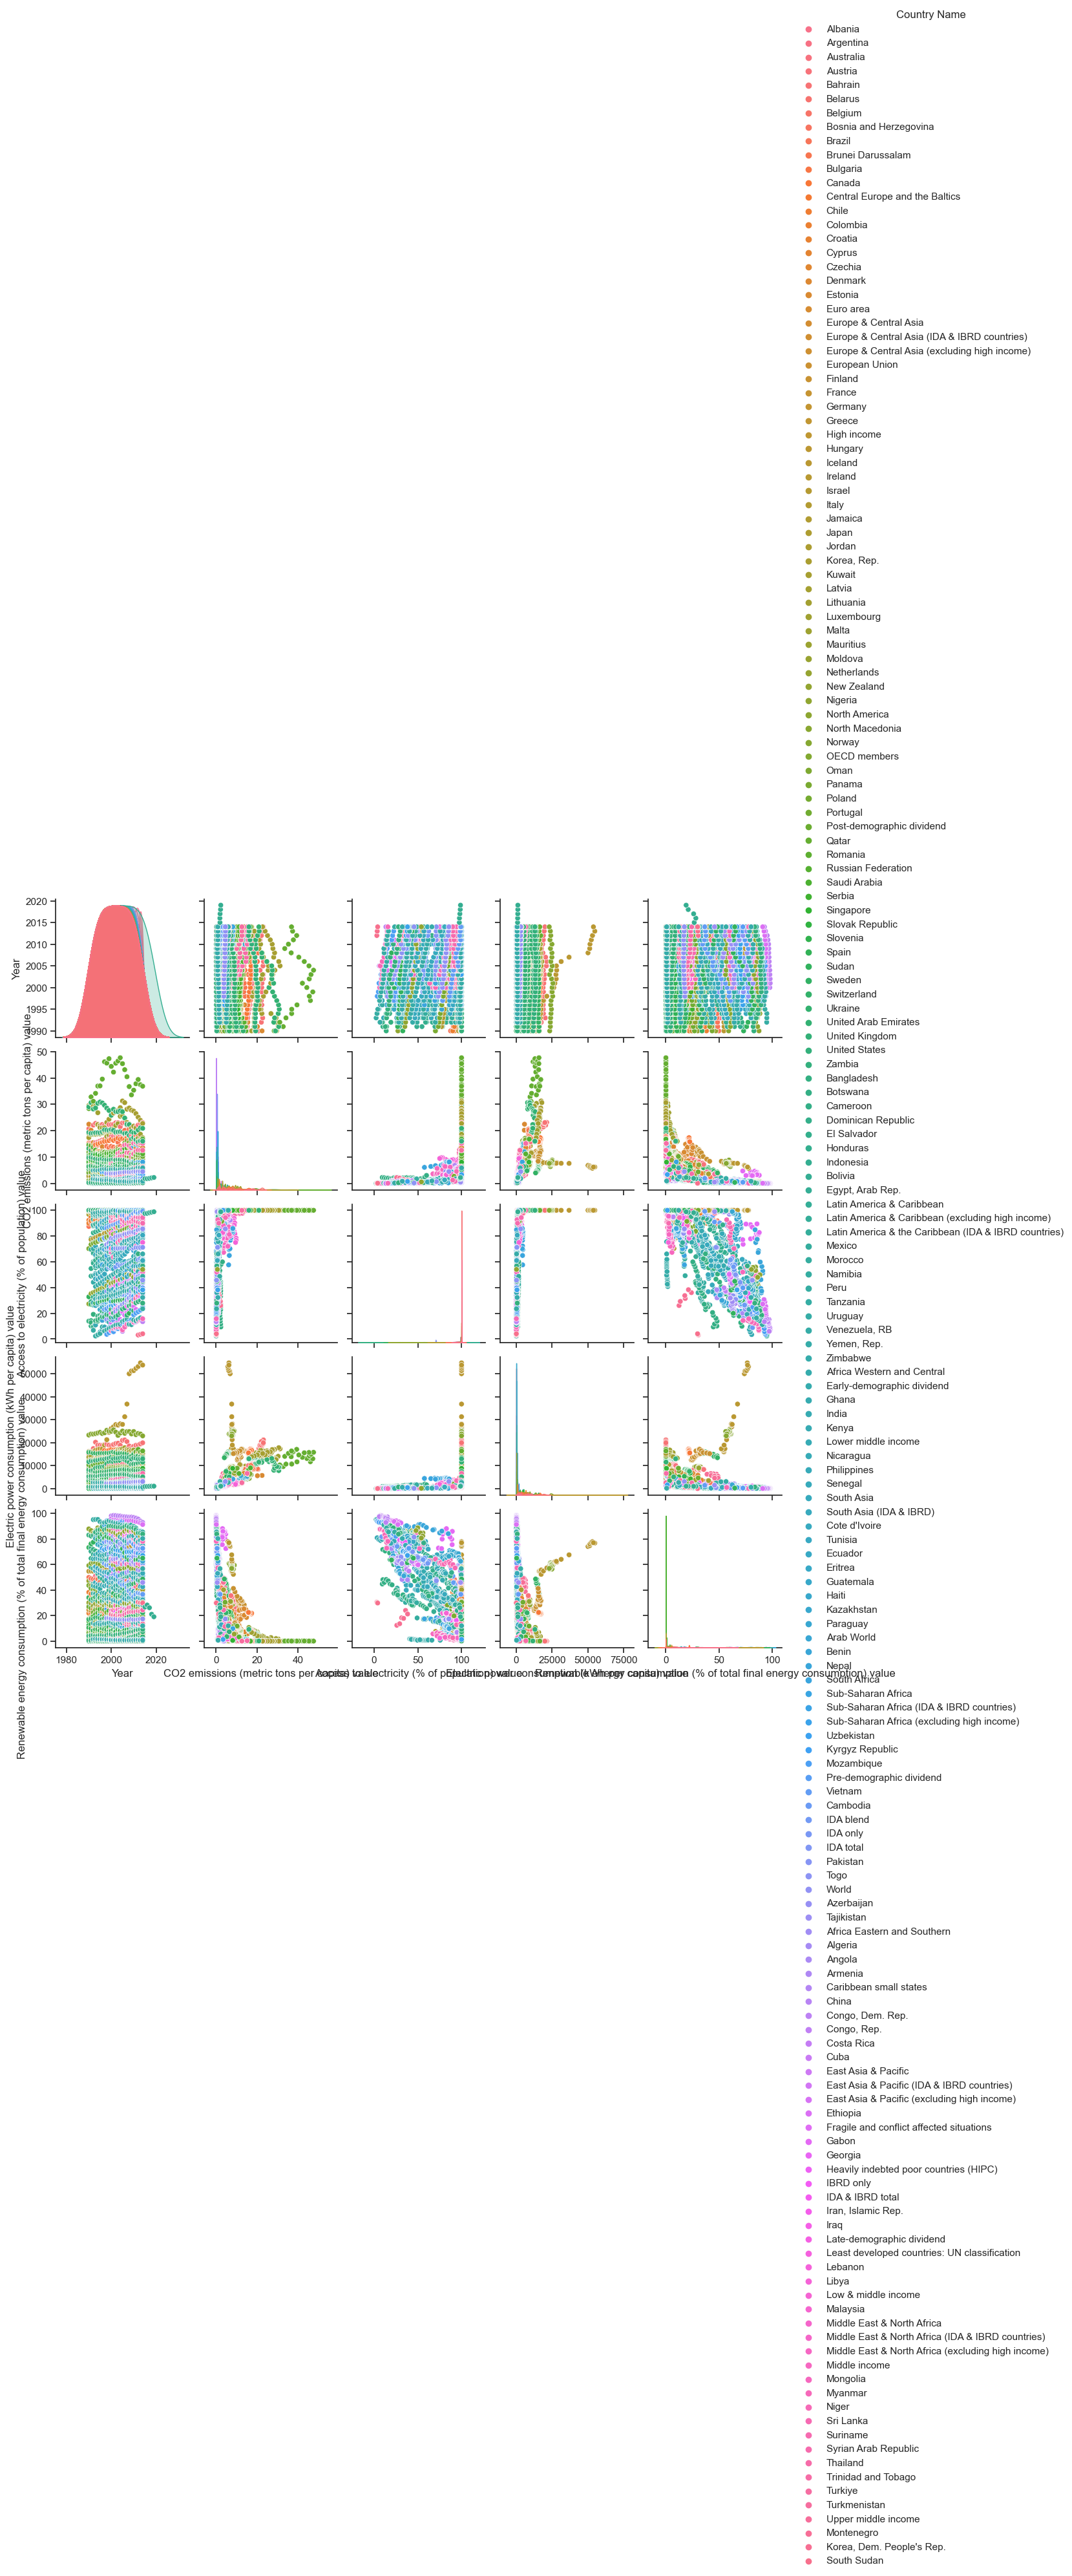

In [136]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(merge_4, hue="Country Name")

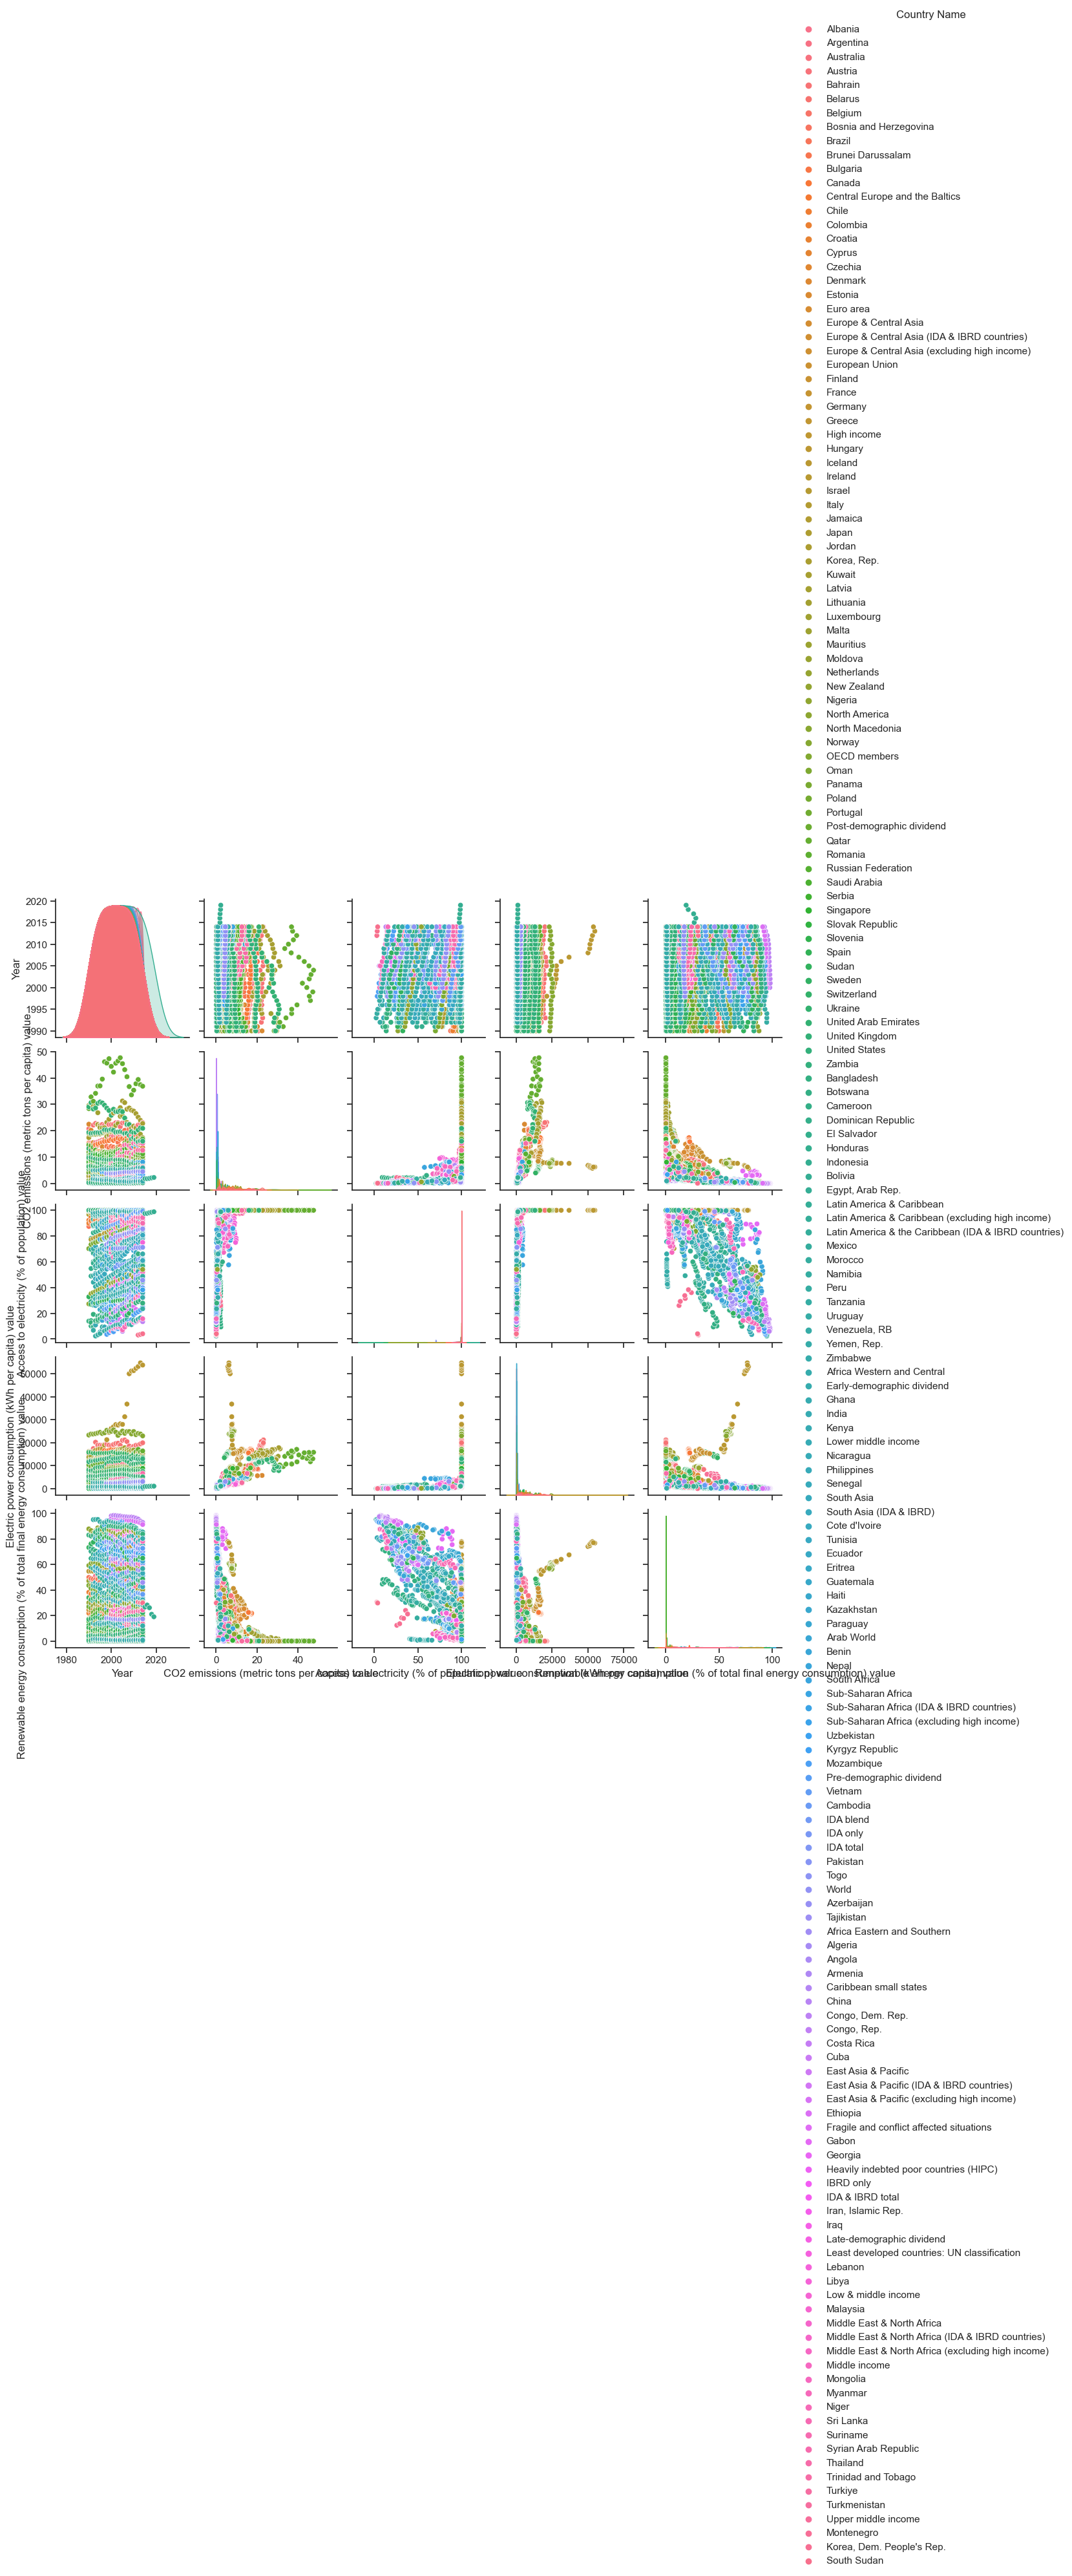

In [137]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(merge_4, hue="Country Name", palette="husl")

In [138]:
labels = np.asarray(merge_5['Country Name'])
labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
df_selected1 = merge_5.drop(['Country Name'], axis=1)


In [139]:
df_features = df_selected1.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()

In [140]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=0)

In [141]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(features_train, labels_train)
svm_predictions = svm_model_linear.predict(features_test)
accuracy = svm_model_linear.score(features_test, labels_test)
print("Test accuracy:",accuracy)

Test accuracy: 0.0


In [142]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(features_train, labels_train)
svm_predictions = svm_model_linear.predict(features_train)
accuracy = svm_model_linear.score(features_train, labels_train)
print('Train accuracy:',accuracy)


Train accuracy: 1.0


In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2).fit(features_train, labels_train)
accuracy = knn.score(features_test, labels_test)
print('Test accuracy:',accuracy)


Test accuracy: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2).fit(features_train, labels_train)
accuracy = knn.score(features_train, labels_train)
print('Train accuracy:',accuracy)


Train accuracy: 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [145]:
## merge_3
# from sklearn.clusters import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(merge_3[['Country Name','Year','CO2 emissions (metric tons per capita) value','Access to electricity (% of population) value',
         'Electric power consumption (kWh per capita) value','Renewable energy consumption (% of total final energy consumption) value']])
    
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.intertia_)
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: could not convert string to float: 'Afghanistan'

In [ ]:
## merge_4 !pip install -U scikit-learn
# !python -m pip show scikit-learn  # to see which version and where scikit-learn is installed
# !python -m pip freeze  # to see all packages installed in the active virtualenv
# !python -c "import sklearn; sklearn.show_versions()"
# !pip install --exists-action=i scikit-learn
# !pip install numpy
# !pip install scipy
# !pip install Scikit-learn
import sklearn
import pandas as pd
from sklearn.datasets import load_iris 
iriss = load_iris()
df_iris = pd.DataFrame(iriss.data, columns=iriss.feature_names)
# from sklearn.cluster import KMeans
import pandas as pd

# from sklearn.clusters import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(merge_4[['Country Name','Year','CO2 emissions (metric tons per capita) value','Access to electricity (% of population) value',
         'Electric power consumption (kWh per capita) value','Renewable energy consumption (% of total final energy consumption) value']])
    
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(merge_4[['Country Name','Year','CO2 emissions (metric tons per capita) value','Access to electricity (% of population) value',
         'Electric power consumption (kWh per capita) value','Renewable energy consumption (% of total final energy consumption) value']])
    wcss.append(kmeans.intertia_)
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels
for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data["Age"],data["Spending Score (1-100)"],c=color[k])
plt.title("Clusters Identified by Guassian Mixture Model")    
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Age")
plt.show()
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)


In [ ]:
API_Data3

In [ ]:
def co2():
    Country_Name = API_Data3['Country Name'].unique()
    for i in Country_Name:
#     plt.figure(figsize=(17,6))
        country_i = API_Data3[API_Data3['Country Name']==i].sort_values('Year')
        plt.plot(country_i['Year'], country_i['Value'], label=i)
        plt.legend()
        plt.plot()
co2()

In [ ]:
API_Data4 = API_Data2[API_Data2['Indicator Name']=='Electric power consumption (kWh per capita)']
Country_Name = API_Data4['Country Name'].unique()
for i in Country_Name:
#     plt.figure(figsize=(17,6))
    country_i = API_Data4[API_Data4['Country Name']==i].sort_values('Year')
    plt.plot(country_i['Year'], country_i['Value'], label=i)
    plt.title('electricity consumption')
    plt.legend()
    plt.plot()

In [ ]:
API_Data4 = API_Data2[API_Data2['Indicator Name']=='Population, total']
Country_Name = API_Data4['Country Name'].unique()
for i in Country_Name:
#     plt.figure(figsize=(17,6))
    country_i = API_Data4[API_Data4['Country Name']==i].sort_values('Year')
    plt.plot(country_i['Year'], country_i['Value'], label=i)
    plt.title('population total')
    plt.legend()
    plt.plot()

In [ ]:
API_Data2

In [ ]:
API_Data5 = API_Data2[(API_Data2['Indicator Name']=='Renewable energy consumption (% of total final energy consumption)')&
                      ((API_Data2['Country Code']=='USA')|(API_Data2['Country Name']=='China'))]
Country_Name = API_Data5['Country Name'].unique()
for i in Country_Name:
#     plt.figure(figsize=(17,6))
    country_i = API_Data5[API_Data5['Country Name']==i].sort_values('Year')
    plt.plot(country_i['Year'], country_i['Value'], label=i)
    plt.title('renewable energy %')
    plt.legend()
    plt.plot()


In [ ]:
API_Data6 = API_Data2[(API_Data2['Indicator Name']=='Renewable energy consumption (% of total final energy consumption)')|
         (API_Data2['Indicator Name']=='Electric power consumption (kWh per capita)')|
         (API_Data2['Indicator Name']=='Population, total')|
         (API_Data2['Indicator Name']=='CO2 emissions (kt)')|
         (API_Data2['Indicator Name']=='Total greenhouse gas emissions (kt of CO2 equivalent)')]

In [ ]:
pivotdata = API_Data6.pivot(index = ['Country Name', 'Year', 'Country Code'], columns = 'Indicator Name', 
                                      values = 'Value').reset_index()

In [ ]:
data = pivotdata[(pivotdata['Country Name']=='China')|(pivotdata['Country Code']=='USA')]
corr = data.corr()
heat = sns.heatmap(corr)
heat

In [ ]:
API_Data5 = API_Data2[API_Data2['Indicator Name'] == 'Electric power consumption (kWh per capita)']
Country_Name = API_Data5['Country Name'].unique()
for i in Country_Name:
#     plt.figure(figsize=(17,6))
    country_i = API_Data5[API_Data5['Country Name'] == i].sort_values('Year')
    plt.plot(country_i['Year'], country_i['Value'], label = i)
    plt.title('Power Consumption', size = 15)
    plt.xlabel('Year', size = 15)
    plt.ylabel('Power consumption(kWh/capita)', size = 15)
    
    
plt.legend()
plt.plot()